In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd

pd.set_option("display.max_colwidth", None)

# Import the dataset

We import the dataset.
The dataset under analysis contains demographic information of defendants. It has 6 features. 

Three features are categorical:
- c_charge_degree
- race
- sex

Three are continuous (specifically, they have integer values):
- age
- priors_count
- lenght of stay


We also have the ground truth label ('class') and the predicted label ('predicted'). The label is 1 if the defendant has an high risk of recidivism.

In [ ]:
from import_datasets import import_process_compas

dfI, class_map = import_process_compas(
    risk_class=True, continuous_col=True
)
dfI.reset_index(drop=True, inplace=True)

dfI["predicted"] = dfI["predicted"].replace({"Medium-Low": 0, "High": 1})
true_class_name, pred_class_name = "class", "predicted"
class_and_pred_names = [true_class_name, pred_class_name]
attributes = list(dfI.columns.drop(class_and_pred_names))

dfI = dfI[attributes + class_and_pred_names]
dfI.head()

In [ ]:
continuous_attributes = ["priors_count", "length_of_stay", "age"]

# Derive discretization trees

We want to derive a discretization tree for each continuous attribute that takes into account the divergence.

We have to set the following parameters:

- metric of interest for which the divergence is computed. Example of admitted values: 
    -  'd_fpr' - false positive rate
    -  'd_fnr' - false negative rate
    -  'd_error' - error rate
    -  'd_accuracy' - accuracy


- Splitting criterion. Admitted values
    - 'entropy' for the entropy-based criterion
    - 'divergence_criterion' for the divergence-based criterion

- minimum support of the nodes  (float) 'min_support_tree' - It represents the minimum size of the node. If the candidates nodes for the split is lower than  'min_support_tree', this split is not performed and another is evaluated


In [25]:
metric = 'd_fpr'                          # We consider the false positive rate divergence
type_criterion = "entropy"      # We consider the entropy_criterion
min_support_tree = 0.1                    # Each node should have at least a support of 0.1, 10% of the dataset

In [26]:
from tree_discretization import TreeDiscretization

df_analyze = dfI.copy()

tree_discr = TreeDiscretization()

# ## Extract tree
generalization_dict, discretizations = tree_discr.get_tree_discretization(
    df_analyze,
    type_splitting='one_at_time',
    min_support=min_support_tree,
    metric=metric,
    class_map=class_map,
    continuous_attributes=list(continuous_attributes),
    class_and_pred_names=["class", "predicted"],
    storeTree=True,
    type_criterion=type_criterion,
)

# Visualize the discretization trees

## Visual representation

In [27]:
if type(tree_discr.trees) is dict:
    tree_vizs = {}
    for attribute in continuous_attributes:
        # By setting all_info=True, we visualize additional info
        tree_vizs[attribute] = tree_discr.trees[attribute].visualizeTreeDiGraph( all_info=False, show_condition=True)


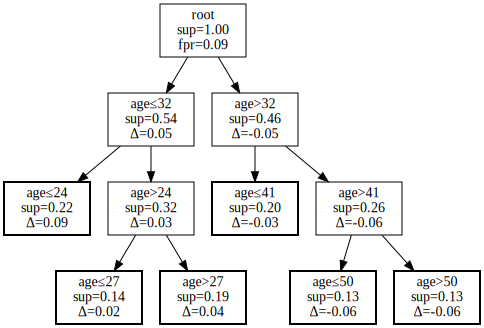

In [28]:
tree_vizs['age']

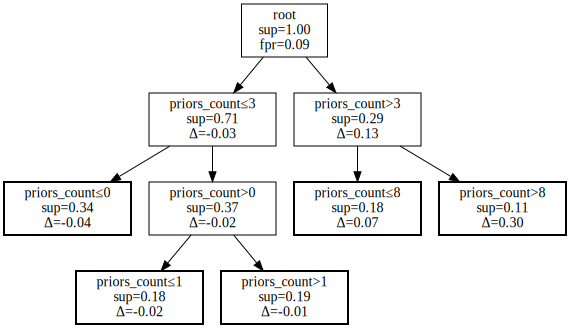

In [29]:
tree_vizs["priors_count"]

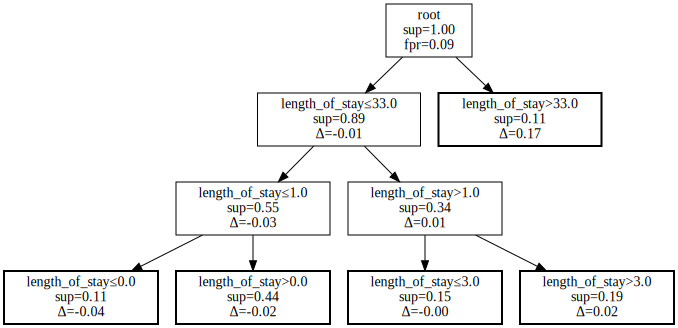

In [30]:
tree_vizs['length_of_stay']

## Textual representation

Print the discretization trees (one for each attribute) using a textual representation

In [31]:
tree_discr.printDiscretizationTrees(round_v = 2)

priors_count
 root s=1.00 --> d_fpr=0.00
         priors_count<=3 s=0.71 --> d_fpr=-0.03
                 priors_count<=0 s=0.34 --> d_fpr=-0.04
                 priors_count>=1 s=0.37 --> d_fpr=-0.02
                         priors_count<=1 s=0.18 --> d_fpr=-0.02
                         priors_count>=2 s=0.19 --> d_fpr=-0.01
         priors_count>=4 s=0.29 --> d_fpr=0.13
                 priors_count<=8 s=0.18 --> d_fpr=0.07
                 priors_count>=9 s=0.11 --> d_fpr=0.30

length_of_stay
 root s=1.00 --> d_fpr=0.00
         length_of_stay<=33.0 s=0.89 --> d_fpr=-0.01
                 length_of_stay<=1.0 s=0.55 --> d_fpr=-0.03
                         length_of_stay<=0.0 s=0.11 --> d_fpr=-0.04
                         length_of_stay>=1.0 s=0.44 --> d_fpr=-0.02
                 length_of_stay>=2.0 s=0.34 --> d_fpr=0.01
                         length_of_stay<=3.0 s=0.15 --> d_fpr=-0.00
                         length_of_stay>=4.0 s=0.19 --> d_fpr=0.02
         length_of_stay>=34